<h1>Zadanie 1<h1>

(451, 650, 3)


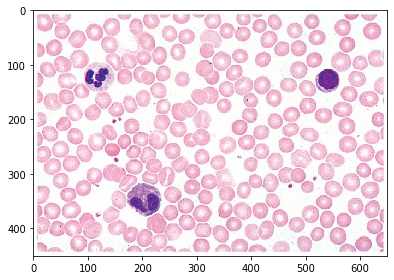

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

image = io.imread('blood_smear.jpg')
ay, ax = np.histogram(image, range=(0, 256), bins=256)
io.imshow(image)
print(image.shape)

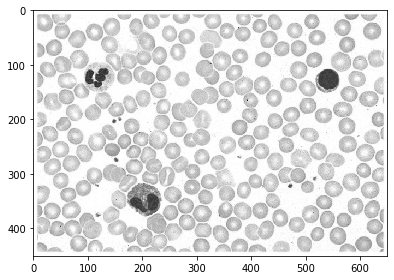

In [2]:
image_gray = io.imread("blood_smear.jpg", as_gray=True)
io.imshow(image_gray)

Text(0.5, 1.0, 'wszystkie krwinki')

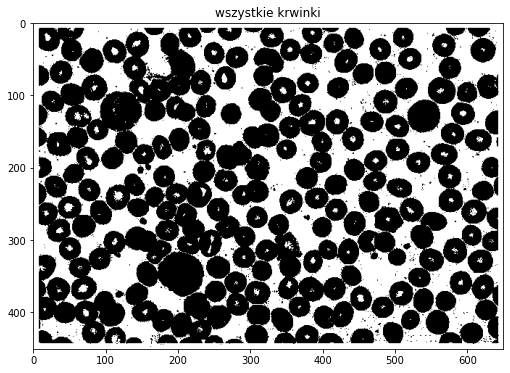

In [3]:
t1 = 0.95
obraz1 = (image_gray > t1) * 1
obraz1 = obraz1.astype('float64')

fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(obraz1, cmap='gray')
ax.set_title("wszystkie krwinki")

Text(0.5, 1.0, 'inne krwinki')

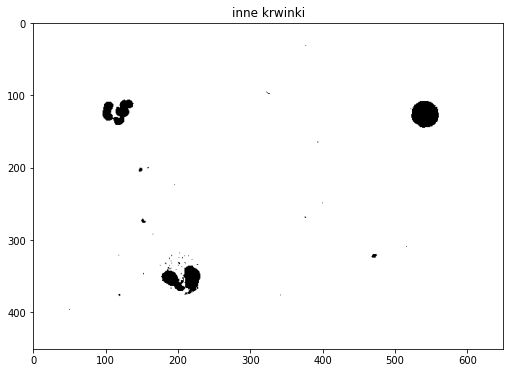

In [4]:
t2 = 0.45
obraz2 = (image_gray > t2) * 1
obraz2 = obraz2.astype('float64')

fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(obraz2, cmap=plt.cm.gray)
ax.set_title("inne krwinki")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


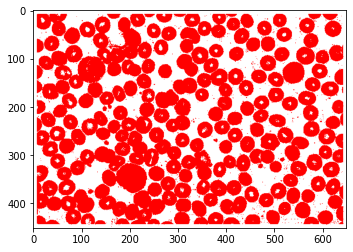

In [5]:
from skimage.color import gray2rgb
obraz1_convert = gray2rgb(obraz1)

obraz1_convert[:,:,0] = obraz1[:,:]
obraz1_convert[:,:,1] = obraz1[:,:]
obraz1_convert[:,:,2] = obraz1[:,:]

mask_red = obraz1_convert[:, :, 0] < 1
mask_white = obraz1_convert[:, :, 0] == 1

obraz1_convert[mask_red] = [255, 0, 0]
obraz1_convert[mask_white] = [255, 255, 255]

plt.imshow(obraz1_convert)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


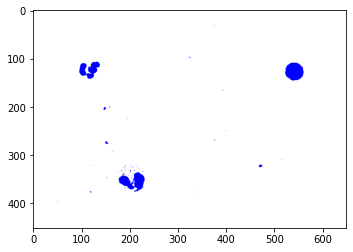

In [6]:
obraz2_convert = gray2rgb(obraz2)

obraz2_convert[:,:,0] = obraz2[:,:]
obraz2_convert[:,:,1] = obraz2[:,:]
obraz2_convert[:,:,2] = obraz2[:,:]

mask_blue = obraz2_convert[:, :, 0] < 1
mask_white = obraz2_convert[:, :, 0] == 1

obraz2_convert[mask_blue] = [0, 0, 255]
obraz2_convert[mask_white] = [255, 255, 255]

plt.imshow(obraz2_convert)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


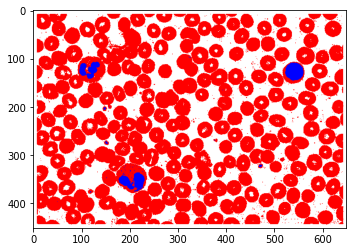

In [7]:
result = obraz1_convert.copy()

for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if obraz2_convert[i][j][0] < 1:
            result[i][j] = obraz2_convert[i][j]
    
plt.imshow(result)
plt.show()

<h1>Zadanie 2<h1>

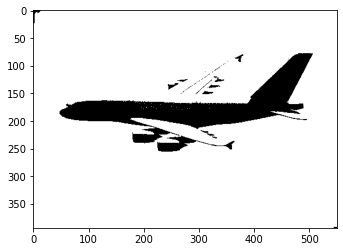

In [8]:
from skimage.color import rgb2gray

image_plane = io.imread("airbus.png")
image_plane_gray = rgb2gray(image_plane)

t = 0.82
binary = (image_plane_gray > t) * 1


plt.imshow(binary, cmap='gray')
plt.show()

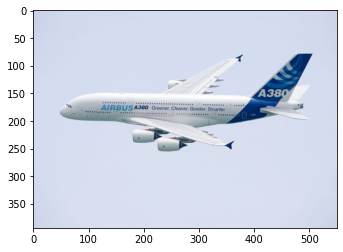

In [9]:
plt.imshow(image_plane)
plt.show()

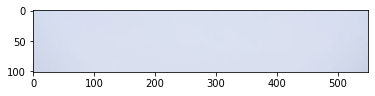

170.114278222425


In [10]:
niebo = image_plane[:][293::]
avg = np.average(niebo)

max_dist = 0

for i in range(niebo.shape[0]):
    for j in range(niebo.shape[1]):
        dist = np.linalg.norm(niebo[i][j]) - avg
        if dist > max_dist:
            max_dist = dist

plt.imshow(niebo, cmap = 'gray')
plt.show()

print(max_dist)

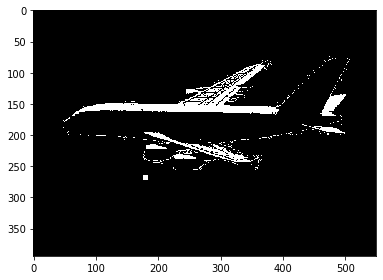

In [11]:
plane_binary = np.ones(image_plane.shape)

for i in range(image_plane.shape[0]):
    for j in range(image_plane.shape[1]):
        if np.linalg.norm(image_plane[i][j]) - avg > max_dist:
            plane_binary[i][j] = 1
        else:
            plane_binary[i][j] = 0

io.imshow(plane_binary)